## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [113]:
# Load libraries
import pandas as pd
import plotly.express as px
import seaborn as sns

In [114]:
# Load data
df = pd.read_csv(r"C:\Users\xavie\OneDrive\Documentos\Ironhack\Week 4\Day 1\lab-eda-univariate\amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [115]:
df_0 = pd.crosstab(df["category"], df["isBestSeller"]).reset_index()     # Apply Crosstab

df_1 = df_0

df_1["percent_best_seller"] = df_1[True] / (df_1[False] + df_1[True])


df_1 = df_1.sort_values("percent_best_seller", ascending=False)

df_1.head()

print("The categories where being a best-seller is more prevalent are:")
for i in df_1["category"].head():
    print(f"  * {i}")

The categories where being a best-seller is more prevalent are:
  * Grocery
  * Smart Home Security & Lighting
  * Health & Personal Care
  * Mobile Phone Accessories
  * Power & Hand Tools


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [116]:
pd.crosstab(df["category"], df["isBestSeller"])

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [117]:
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(pd.crosstab(df["category"], df["isBestSeller"]))
chi2_statistic, chi2_p_value

print(f"p value of {chi2_p_value} means there is association")

p value of 0.0 means there is association


In [118]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
cramer = association(pd.crosstab(df["category"], df["isBestSeller"]), method="cramer")
print(f"As Cramer association is close to 0.1 ({cramer}), it indicates there is weak association between the variables")

As Cramer association is close to 0.1 (0.1222829439760564), it indicates there is weak association between the variables


3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

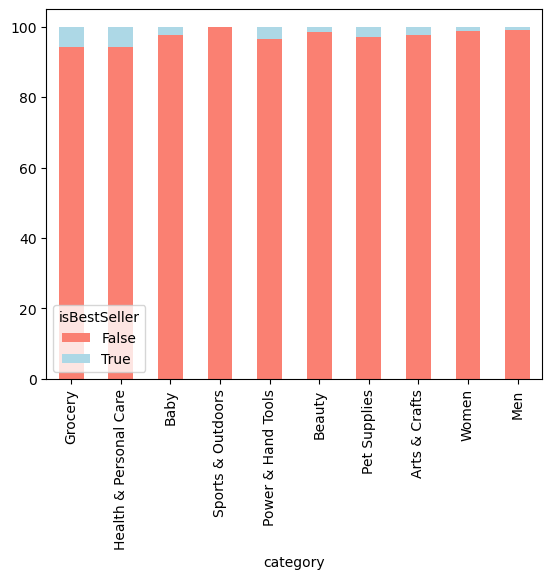

In [119]:
import pandas as pd

# Create a crosstab of counts and normalize by the row total to get percentages
counts = pd.crosstab(df["category"], df["isBestSeller"]).sort_values(True, ascending=False)
counts_percentage = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the top 10 categories as a percentage
plt = counts_percentage[0:10].plot(kind='bar', stacked=True, color=['salmon', 'lightblue'])


### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [120]:
# Calculate outliers
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

df_outliers = pd.DataFrame(tukeys_test_outliers(df["price"]))

In [121]:
# Remove outliers from df
df = df[df["price"] <= df_outliers["price"].min()]
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

In [122]:
df_count_categories = pd.DataFrame(df["category"].value_counts())

In [123]:
df[df['category'].isin(df_count_categories[0:20].index)]

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


Men and Fragances categories tend to have the highest median price


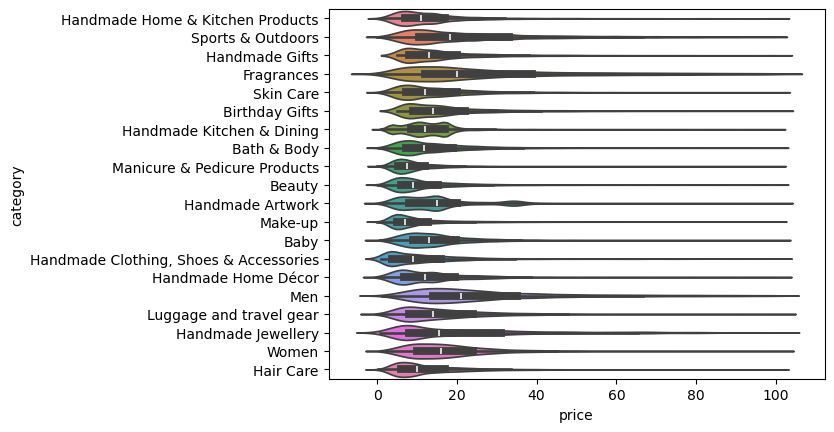

In [124]:
sns.violinplot(data = df[df['category'].isin(df_count_categories[0:20].index)],
                y = 'category', x='price', hue="category")
print("Men and Fragances categories tend to have the highest median price")

In [125]:
df[["category", "price"]].groupby("category").median().sort_values("price", ascending = False)
print("Desktop PCs category tend to have the highest median price")

Desktop PCs category tend to have the highest median price


2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

<Axes: xlabel='price', ylabel='category'>

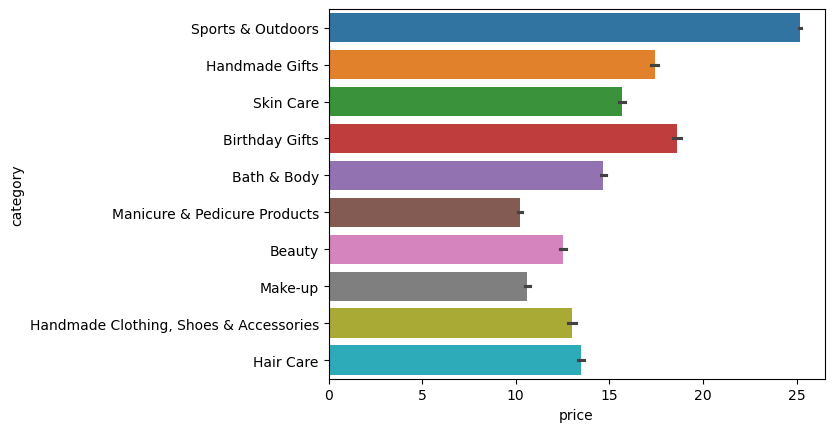

In [126]:
sns.barplot(data = df[df['category'].isin(df_count_categories[0:10].index)],
                y = 'category', x='price', hue="category")

In [127]:
print(df[["category", "price"]].groupby("category").mean().sort_values("price", ascending = False))
print("Motherboards category tend to be the category with highest average price")

                           price
category                        
Motherboards           68.772432
Boxing Shoes           67.417803
Desktop PCs            66.915562
Tablets                66.567388
Graphics Cards         65.103509
...                          ...
Bedding Accessories     8.835220
Adapters                8.750197
Signs & Plaques         8.210513
Arts & Crafts           8.006540
Office Paper Products   6.876369

[296 rows x 1 columns]
Motherboards category tend to be the category with highest average price


3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

<Axes: xlabel='price', ylabel='category'>

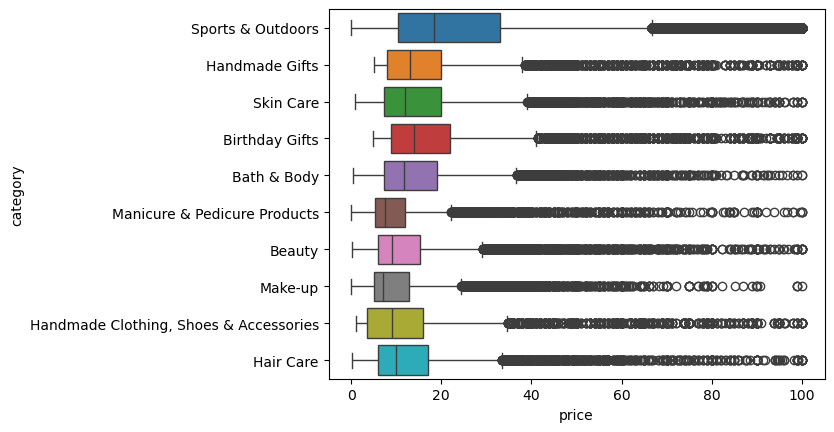

In [128]:
sns.boxplot(data = df[df['category'].isin(df_count_categories[0:10].index)],
                y = 'category', x='price', hue="category")

In [129]:
print(df[["category", "price"]].groupby("category").median().sort_values("price", ascending = False))
print("Desktop PCs category tend to be the category with highest average price")

                       price
category                    
Desktop PCs            74.00
Boxing Shoes           69.79
Tablets                69.00
Graphics Cards         68.54
Motherboards           67.92
...                      ...
Adapters                7.05
Make-up                 7.00
Signs & Plaques         6.99
Arts & Crafts           5.99
Office Paper Products   4.37

[296 rows x 1 columns]
Desktop PCs category tend to be the category with highest average price


### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

In [130]:
print(df['price'].corr(df['stars']))
print("There is no correlaiton between price and stars rating")

-0.07746130166734945
There is no correlaiton between price and stars rating


2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

<Axes: xlabel='price', ylabel='stars'>

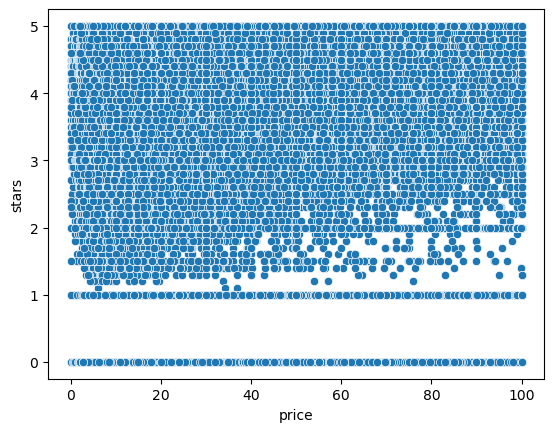

In [ ]:
print(sns.scatterplot(data=df, x='price', y='stars'))
print("No patterns obverved")

<Axes: >

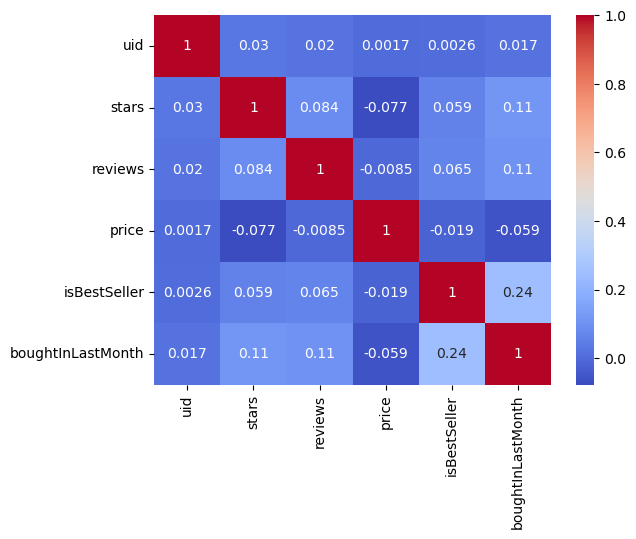

In [ ]:
df_numerical = df.select_dtypes(include=['number', 'bool'])

correlation_matrix = df_numerical.corr()
# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

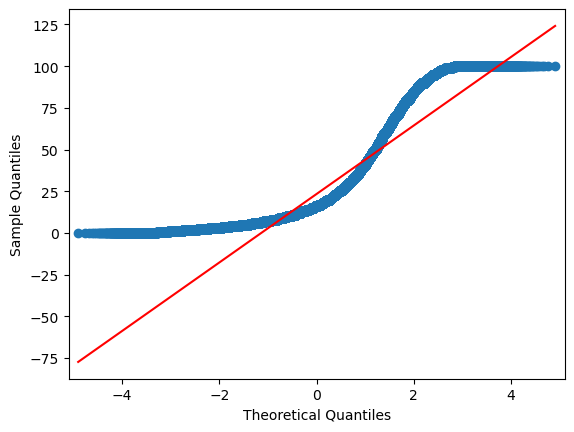

In [138]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?